In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('social.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Scaling the the predictor variables, and converting it to numpy arrays.

In [4]:
df_indepent= df[['Age','EstimatedSalary']]
mean = np.mean(df_indepent)
std = np.std(df_indepent)
df_indepent = (df_indepent - mean) / std
df_indepent = df_indepent.to_numpy()
df_y=df[['Purchased']]
df_y = df_y.replace(0,-1)
df_y = df_y.to_numpy()

Randomly taking 75% for training and 25% for testing.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_indepent, df_y, test_size=0.25, random_state=42)

# Implementing SVM algorithm

## The Cost Function
# $ min_\theta \ C\sum_{i-1}^m y^{(i)} cost_1 (\theta^T x^{(i)}) + (1-y^{(i)}) cost_0(\theta^T x^{(i)}) + \sum_{j=1}^n \theta_j^2 $

# C is use for regularization.
# theta are the parameters
# cost 0 and cost 1 are the hinge loss

In [6]:
import numpy as np 


class SVM:
# learning rate = 0.0001 with iterartins =1000
    def __init__(self, learning_rate=0.0001,  n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.w = None
        self.b = None
# function to fit the training data

    def fit(self, X, y,C):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        print('shape1',self.w.shape)
        self.b = 0

        for i in range(self.n_iters):
            w_r_t_w = self.w.T
            w_r_t_b = 0
            for idx, x_i in enumerate(X):
                # Implementing the cost funtion
                #print('x_i_shape',x_i.shape)
                t_n = y_[idx]* (np.dot(self.w.T,x_i) + self.b) 
                l_t = max(0,1-t_n)
                cost = 1/2 * np.dot(self.w, self.w) + l_t
                
                # implementing the subgradient condition
                if t_n < 1:
                    g_t = -1
                else:
                    g_t = 0
                    
                # implementing gradient descent
                w_r_t_w -=  C * (g_t * (y_[idx] * x_i))
                w_r_t_b -=  C * (g_t * y_[idx])
            [self.w,self.b] = np.array([self.w,self.b]).T - self.lr * np.array([w_r_t_w , w_r_t_b]).T 
            
                
# function to predict the test data

    def predict(self, X):
        approx = np.dot(X, self.w ) - self.b
        return np.sign(approx)

In [7]:
clf = SVM()

# Fit for training with C = 50

In [8]:
clf.fit(x_train,y_train,50)

shape1 (2,)


In [9]:
print(clf.w, clf.b)

[620.97911049 310.60193814] [539.095]


# Output of the predict function

In [10]:
clf.predict(x_test)

array([-1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1.])

# Confusion table for C =50

In [11]:
y_actu = y_test
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_actu, y_pred)

In [12]:
confusion_table = pd.DataFrame(cm, index = ['predicted= 1','predicted= -1'], columns = ['Actual= 1','Actual= -1'] )

In [13]:
confusion_table

,Actual= 1,Actual= -1
predicted= 1,63,0
predicted= -1,14,23


# 86% of test data was classified correctly

## Fiting for C=100 and Confusion table

In [14]:
clf.fit(x_train,y_train,100)

shape1 (2,)


In [15]:
clf.predict(x_test)

array([-1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1.])

In [16]:
y_actu = y_test
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_actu, y_pred)

In [17]:
confusion_table = pd.DataFrame(cm, index = ['predicted= 1','predicted= -1'], columns = ['Actual= 1','Actual= -1'] )

In [18]:
confusion_table

,Actual= 1,Actual= -1
predicted= 1,63,0
predicted= -1,16,21


# when C=100 the accuracy goes down. It causes the decision boundary shift towards the -1 label.

## Fiting for C = 1, and confusion table

In [19]:
clf.fit(x_train,y_train,1)

shape1 (2,)


In [20]:
clf.predict(x_test)

array([-1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1.])

In [21]:
y_actu = y_test
y_pred = clf.predict(x_test)
cm=confusion_matrix(y_actu, y_pred)

In [22]:
confusion_table = pd.DataFrame(cm, index = ['predicted= 1','predicted= -1'], columns = ['Actual= 1','Actual= -1'] )

In [23]:
confusion_table

,Actual= 1,Actual= -1
predicted= 1,62,1
predicted= -1,14,23


# When C=1, the accuracy is affected, and the boundary is shifted towards 1 labels. 

# C=50 is the best parameter because the decision boundary is not shifted towards any label thus the accuracy is greater.

In [24]:
#Visualizing the training data

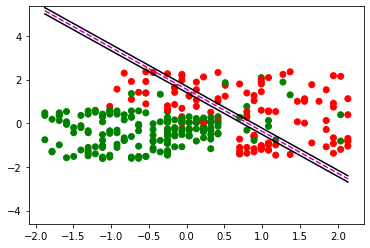

In [25]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    colors = ['green','red']
    labels=[1,-1]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #plt.scatter(X[:,0], X[:,1], marker='o',c=y)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train.ravel(), cmap=matplotlib.colors.ListedColormap(colors))
    
    x0_1 = np.amin(x_train[:,0])
    x0_2 = np.amax(x_train[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'm--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(x_train[:,1])
    x1_max = np.amax(x_train[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()

In [26]:
#visualing the test data

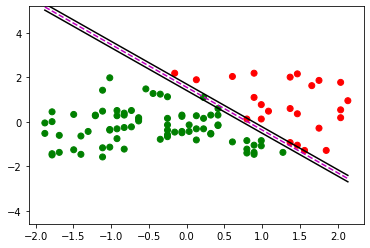

In [27]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    colors = ['green','red']
    labels=[1,-1]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #plt.scatter(X[:,0], X[:,1], marker='o',c=y)
    plt.scatter(x_test[:,0], x_test[:,1], c=clf.predict(x_test).ravel(), cmap=matplotlib.colors.ListedColormap(colors))
    
    x0_1 = np.amin(x_test[:,0])
    x0_2 = np.amax(x_test[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'm--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(x_test[:,1])
    x1_max = np.amax(x_test[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()